In [72]:
import numpy as np 
import pandas as pd
from sklearn import datasets

In [73]:
iris=datasets.load_iris()

In [74]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [75]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [76]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [77]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
x=iris.data[:,0:4]
y=iris.target

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [81]:
clas= KNeighborsClassifier(n_neighbors=5)

In [82]:
clas.fit(xtrain,ytrain)

KNeighborsClassifier()

In [83]:
yh=clas.predict(xtest)

In [84]:
print('accuacry score is ',accuracy_score(ytest,yh))

accuacry score is  0.9777777777777777


In [85]:
from sklearn.metrics import confusion_matrix


In [86]:
print('accuacry score is ',confusion_matrix(ytest,yh))

accuacry score is  [[13  0  0]
 [ 0 15  1]
 [ 0  0 16]]


In [87]:
df['species'] = iris.target

In [88]:
corr_matrix=df.corr()

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

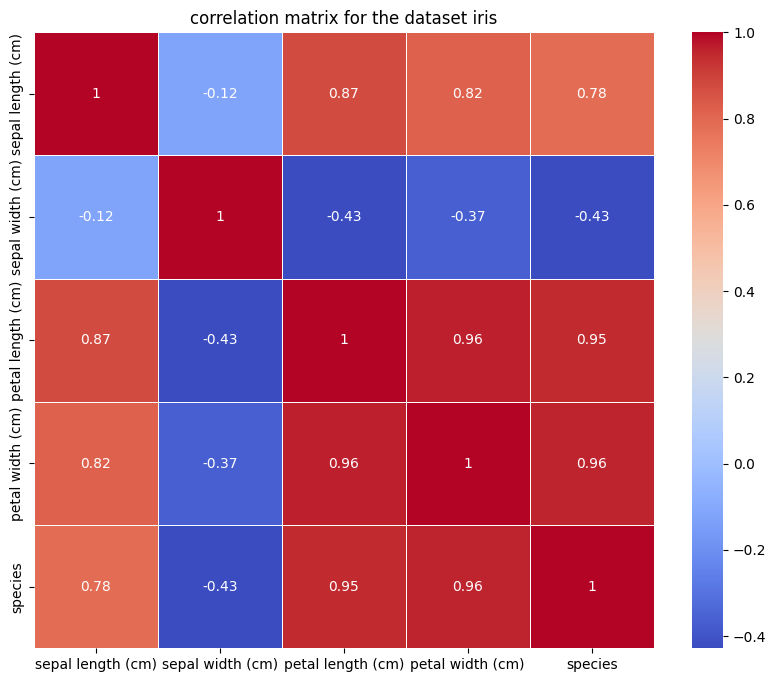

In [90]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('correlation matrix for the dataset iris')
plt.show

minim error is 0.0 at k= 6
max accuracy is 1.0 at k= 6


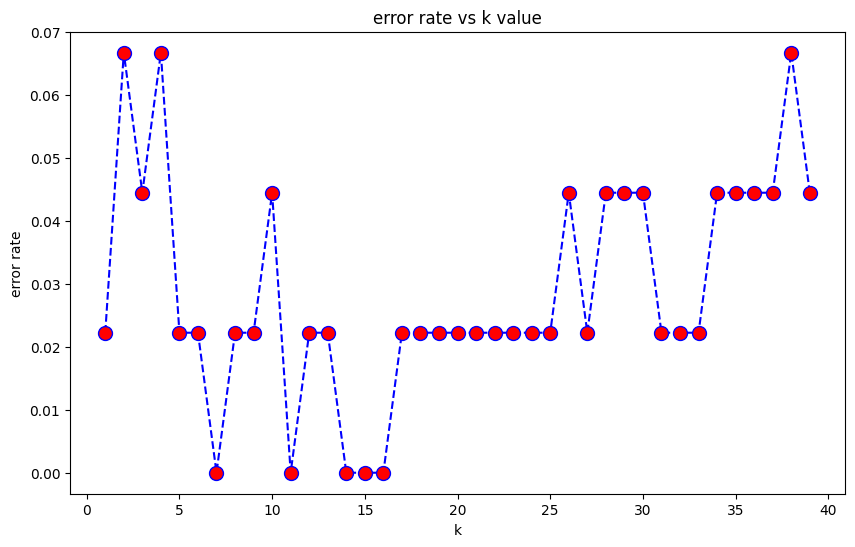

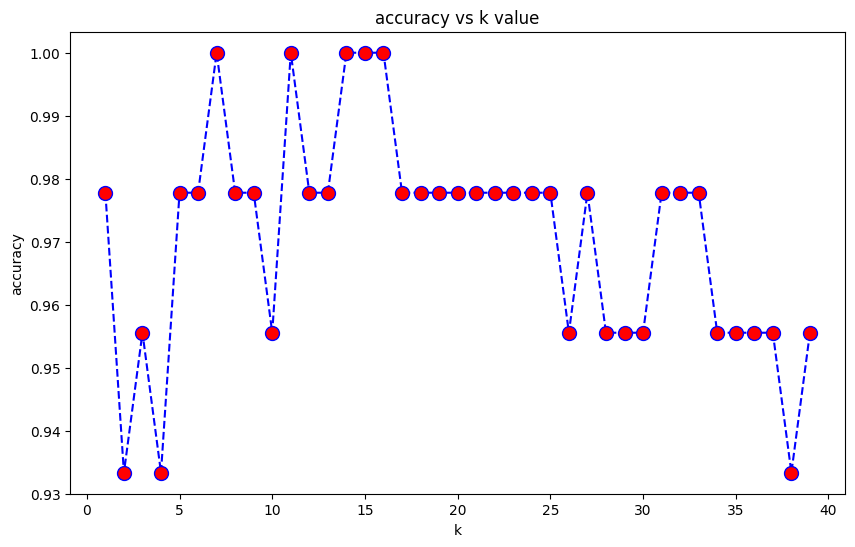

In [91]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    error_rate.append(np.mean(pred_i!=ytest))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error rate')
print('minim error is',min(error_rate),'at k=',error_rate.index(min(error_rate)))
acc=[]
from sklearn.metrics import accuracy_score
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    acc.append(accuracy_score(ytest,pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy vs k value')

plt.xlabel('k')
plt.ylabel('accuracy')
print('max accuracy is',max(acc),'at k=',acc.index(max(acc)))


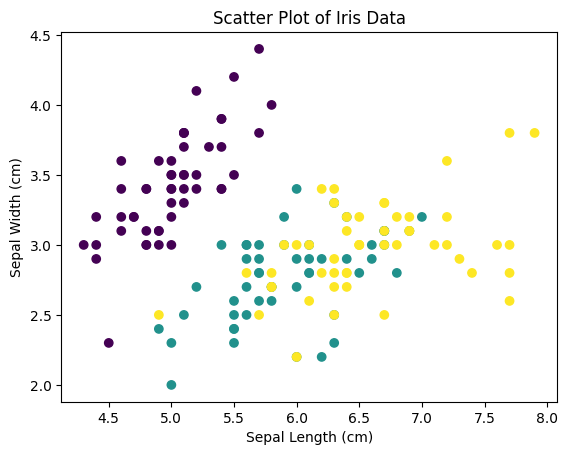

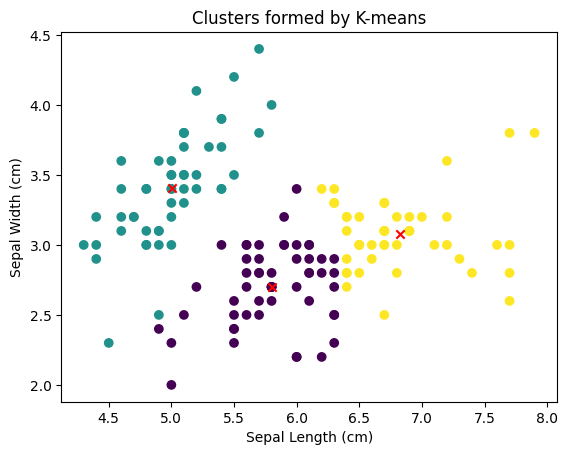

In [92]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Visualize scatter plot of the data
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Iris Data')
plt.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['sepal length (cm)', 'sepal width (cm)']])

# Visualize clusters formed by K-means
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters formed by K-means')
plt.show()
